Recommended 'Ad Topic Line' based on most clicks:
Visionary reciprocal circuit
Visionary multi-tasking alliance
Visionary mission-critical application
Visionary maximized process improvement
Visionary client-driven installation


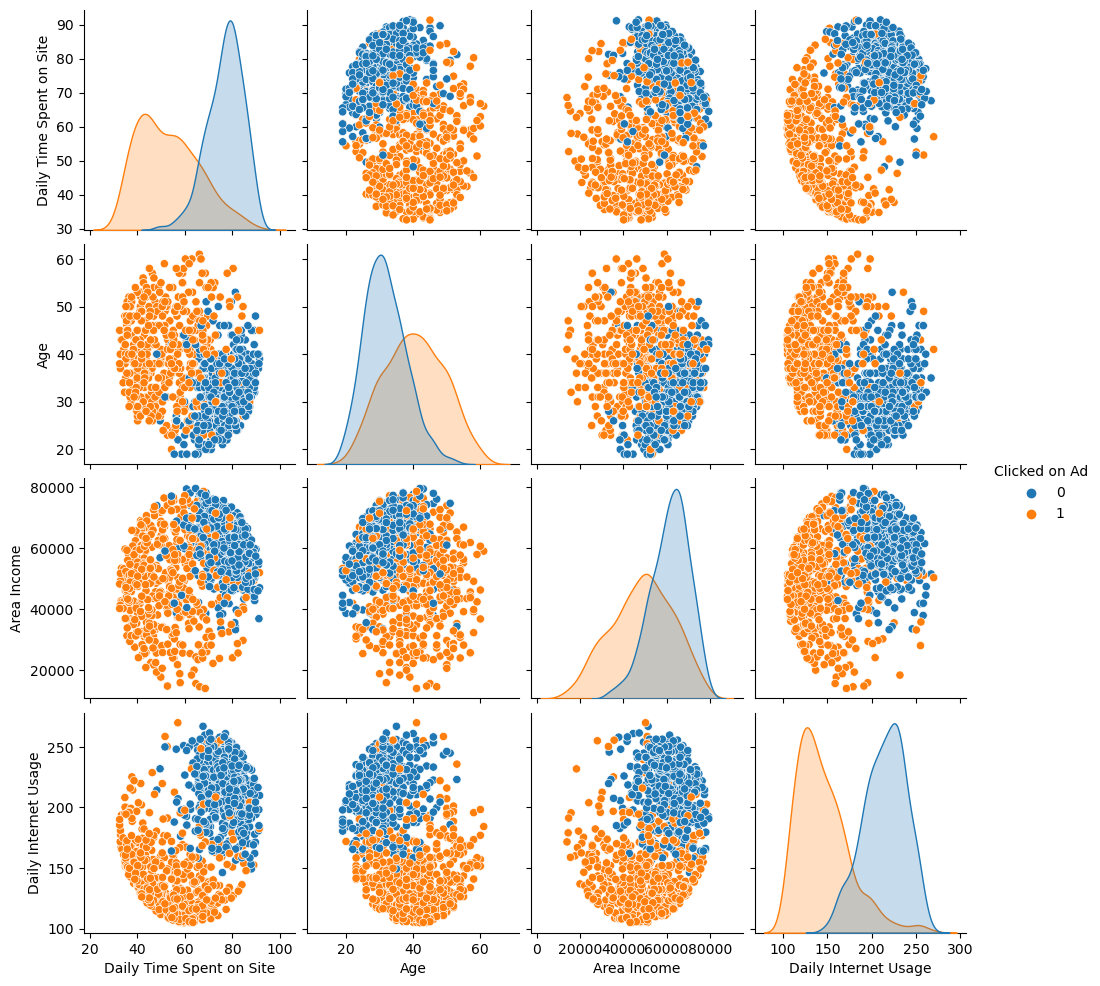

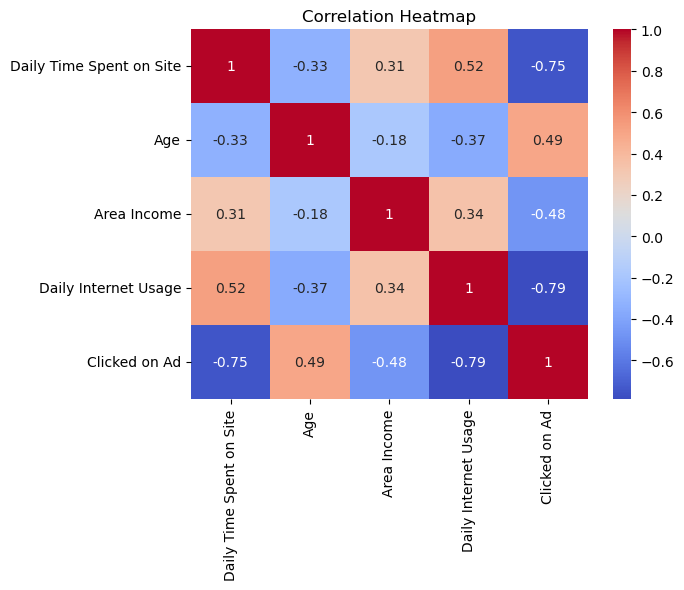

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/kaggle/input/advertisement-click-on-ad/advertising.csv')

# Create a binary rating column based on 'Clicked on Ad'
data['Rating'] = data['Clicked on Ad']

# Generate fake user indices
num_users = len(data)
user_indices = ['User' + str(i) for i in range(num_users)]
data['User'] = np.random.choice(user_indices, size=num_users, replace=True)

# Define the Reader object
reader = Reader(rating_scale=(0, 1))

# Load the dataset into Surprise
dataset = Dataset.load_from_df(data[['Ad Topic Line', 'User', 'Rating']], reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(dataset, test_size=0.2)

# Build the recommender system model
algo = SVD()
algo.fit(trainset)

# Get recommendations for a specific user
user_id = 'User123'
num_recommendations = 5
user_items = data[data['User'] == user_id]['Ad Topic Line'].unique()
all_items = data['Ad Topic Line'].unique()
items_to_recommend = list(set(all_items) - set(user_items))

# Predict ratings for the items to recommend
predicted_ratings = [algo.predict(user_id, item_id).est for item_id in items_to_recommend]

# Sort the recommendations based on predicted ratings (descending order)
sorted_recommendations = [item for _, item in sorted(zip(predicted_ratings, items_to_recommend), reverse=True)]

# Print the recommended items based on most clicks
print("Recommended 'Ad Topic Line' based on most clicks:")
for item in sorted_recommendations[:num_recommendations]:
    print(item)

# Compare features using seaborn
sns.pairplot(data, vars=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], hue='Clicked on Ad')
plt.show()

# Create correlation matrix and plot heatmap
numeric_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
